In [72]:
import norm_heatmap
import normalize
import experiment_normalized_depth_loss
import tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import heatmap_workflow_tools as hwt
import os

# 1. Pre-Processing

### 1.1. Adjust Variables as Necessary (input required)

In [73]:
# In quotes, put paths to folders containing tiffs for SOI and Normalization signals, respectively
stack_dir = os.path.abspath("/Users/Kyle/Desktop/Heat Map Code/Heatmaps/Image_P2X7/P2X7_")
norm_dir = os.path.abspath("/Users/Kyle/Desktop/Heat Map Code/Heatmaps/Image_P2X7/DAPI_/")

# What is your signal of interest (SOI) and normalization signal (NS) 
soi = "P2X7R"
ns = "DAPI"

# Replace with slice integers or decimal percentages. 'None' for no boundary. refer to zmin and zmax as microns on the x-axis in your graphs
zmin, zmax = None, None

# How many microns is a single image/slice?
slice_depth = 0.79

# Do you want to save your figures?
save_figs = True 

# Adjust the lower and upper threshold
lower_thresh = 10 
upper_thresh = 254

### 1.2. Variable Processing

In [74]:
stack_tiffs = tools.get_files(stack_dir)

In [75]:
norm_tiffs = tools.get_files(norm_dir)

In [76]:
zmin, zmax = hwt.process_zmin_zmax(zmin, zmax, stack_tiffs)
print(f"Processed ZMin and ZMax: {zmin}, {zmax}")

Processed ZMin and ZMax: 0, 44


In [77]:
stack_name = os.path.basename(stack_dir)
norm_name = os.path.basename(norm_dir)
base_dir = os.path.basename(os.path.dirname(norm_dir))
out_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..', 'hmp_paper_data'))
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
out_dir = os.path.join(out_dir, f"{base_dir}_{stack_name}n{norm_name}_out")
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

# 2. Raw Heatmap

### 2.1. Signal of Interest (SOI) Mean Slice Intensity (MSI)

figure saved


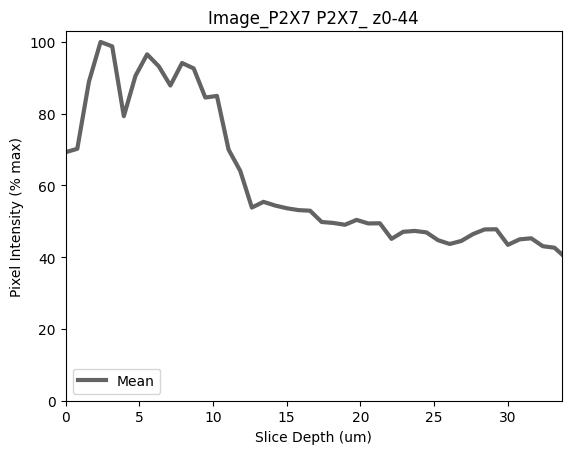

In [78]:
stack_means = np.array([])
for img in stack_tiffs[zmin:zmax]:
    mean = normalize.tiff_stats_thresh(img, lower_thresh, upper_thresh, 1)
    stack_means = np.append(stack_means, mean)
hwt.plot_MSI(stack_means, slice_depth,
             f"{base_dir} {stack_name} z{zmin}-{zmax}",
             os.path.join(out_dir, f"{base_dir}_{stack_name}_z{zmin}-{zmax}_SOI_Intensity.pdf"), save_figs)

### 2.2. SOI Mean Intensity Projection

In [79]:
imgs = norm_heatmap.stack(stack_tiffs[zmin:zmax], ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Image_P2X7/P2X7_...
Completing post-processing for z, x and y composite(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Image_P2X7/P2X7_...


figure saved


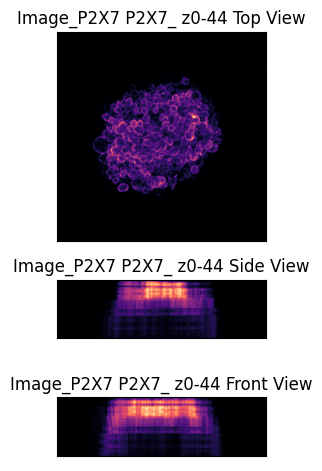

In [80]:
hwt.plot_MIP(imgs, f"{base_dir} {stack_name} z{zmin}-{zmax}", 
                os.path.join(out_dir, f"{base_dir}_{stack_name}_z{zmin}-{zmax}_HeatMap.pdf"), save_figs)

# 3. Getting Normalized Heatmap

### 3.1. Normalization Signal MSI

figure saved


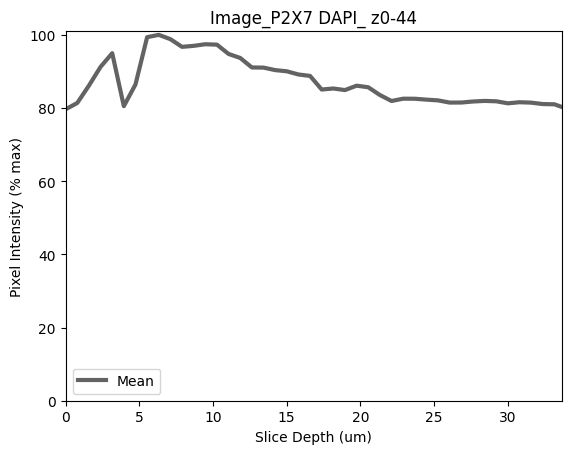

In [81]:
norm_means = np.array([])
for norm_tiff in norm_tiffs[zmin:zmax]:
    mean = normalize.tiff_stats_thresh(norm_tiff, lower_thresh, upper_thresh, 1)
    norm_means = np.append(norm_means, mean)
hwt.plot_MSI(norm_means, slice_depth,
             f"{base_dir} {norm_name} z{zmin}-{zmax}",
             os.path.join(out_dir, f"{base_dir}_{stack_name}_z{zmin}-{zmax}_Norm_Intensity.pdf"), save_figs)


### 3.2. Normalized SOI MSI

In [82]:
%%capture
norm_stack_tiffs = normalize.mean_normalizer(stack_tiffs, norm_tiffs, 0, -1, True, False)

figure saved


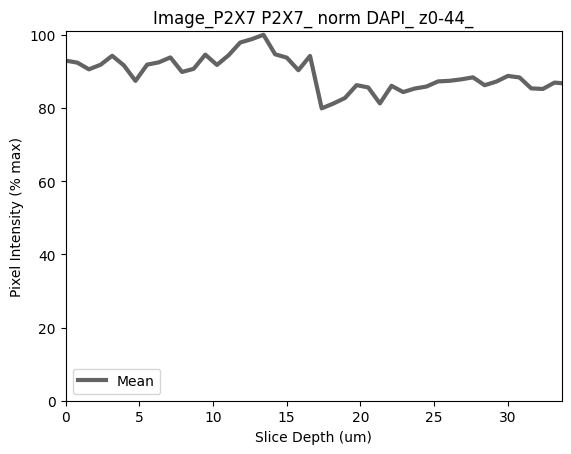

In [83]:
norm_stack_means = np.array([])
for norm_stack_tiff in norm_stack_tiffs[zmin:zmax]:
    mean = normalize.tiff_stats_thresh(norm_stack_tiff, lower_thresh, upper_thresh, 1)
    norm_stack_means = np.append(norm_stack_means, mean)
hwt.plot_MSI(norm_stack_means, slice_depth,
             f"{base_dir} {stack_name} norm {norm_name} z{zmin}-{zmax}_",
             os.path.join(out_dir, f"{base_dir}_{stack_name}n{norm_name}_z{zmin}-{zmax}_Normalized_Intensity.pdf"), save_figs)

figure saved


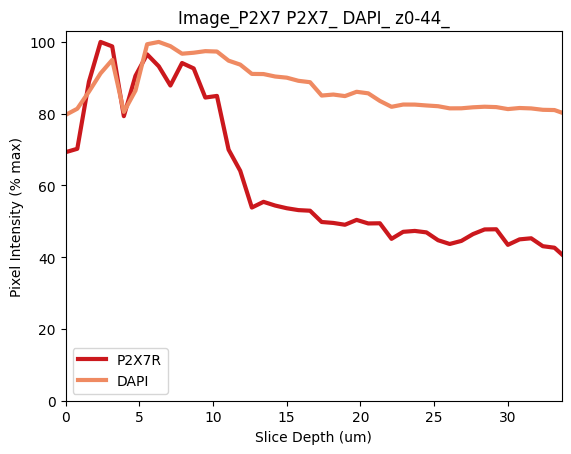

In [84]:
hwt.plot_MSI_soi_ns(soi, ns, stack_means, norm_means, slice_depth, f"{base_dir} {stack_name} {norm_name} z{zmin}-{zmax}_",
             os.path.join(out_dir, f"{base_dir}_{stack_name}n{norm_name}_z{zmin}-{zmax}_SOI_vs_NS.pdf"), save_figs)

figure saved


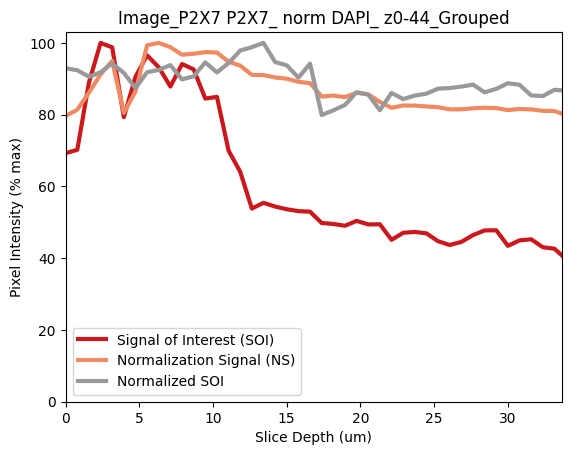

In [85]:
hwt.plot_MSI_grouped(stack_means, norm_means, norm_stack_means, slice_depth, f"{base_dir} {stack_name} norm {norm_name} z{zmin}-{zmax}_Grouped",
                os.path.join(out_dir, f"{base_dir}_{stack_name}n{norm_name}_z{zmin}-{zmax}_Normalized_Intensity_grouped.pdf"), save_figs)

### 3.3. Normalized SOI Mean Intensity Projection

In [86]:
imgs = norm_heatmap.stack(norm_stack_tiffs[zmin:zmax], ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Image_P2X7/P2X7__rn_DAPI_...
Completing post-processing for z, x and y composite(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Image_P2X7/P2X7__rn_DAPI_...


figure saved


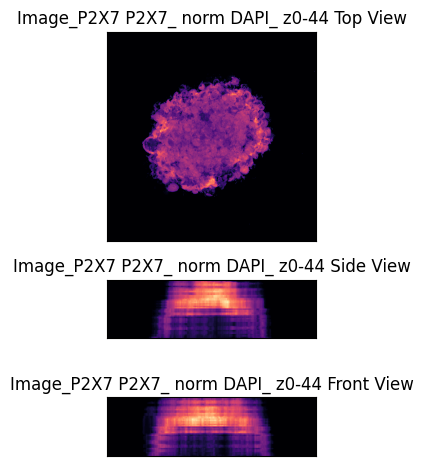

In [87]:
hwt.plot_MIP(imgs, f"{base_dir} {stack_name} norm {norm_name} z{zmin}-{zmax}", 
                os.path.join(out_dir, f"{base_dir}_{stack_name}n{stack_name}_z{zmin}-{zmax}_Normalized_HeatMap.pdf"), save_figs)